# Linear Regression - Predição do Peso da Carcaça

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm

In [38]:
df = pd.read_csv('../../dados/dados_normalizados_mim_max.csv', sep=';')

In [3]:
df.shape

(960939, 53)

## Criando conjunto de treino e de teste

In [39]:
#variável dependente / resposta / variável alvo.
y = df['peso']

In [40]:
# variáveis independentes / variáveis explicativas
X = df.drop('peso',axis=1)

In [26]:
SEED = 420

In [41]:
#dividir o conjunto de dados em 75%/25% da divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

## Instaciando a classe LinearRegression

In [42]:
modelo = LinearRegression()

In [43]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o Coeficiente de determição (R²) do modelo estimado com os dados de treino 

In [44]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.593


## Previsões dados de treino

In [48]:
y_predicted = modelo.predict(X_test)
y_predicted_train = modelo.predict(X_train)

## Avaliando o modelo

In [11]:
print("1) The model explains,", np.round(mt.explained_variance_score(y_test,y_predicted)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error (MAE) of model is:", np.round(mt.mean_absolute_error(y_test,y_predicted),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(y_test,y_predicted),2))
print("4) The Root Mean Square Error (RMSE) of the model is " , np.round(np.sqrt(mt.mean_squared_error(y_test, y_predicted)),2))

1) The model explains, 59.33 % variance of the target w.r.t features is
2) The Mean Absolute Error (MAE) of model is: 22.49
3) The R-Square score of the model is  0.59
4) The Root Mean Square Error (RMSE) of the model is  28.32


Abaixo estão os coeficientes e interceptações da equação de regressão calculados pelo modelo.

In [12]:
index = ['Intercepto','tipificacao_1', 'tipificacao_2', 'tipificacao_3', 'maturidade', 'acabamento','classificacao_estabelecimento', 'outros_incentivos', 'pratica_recuperacao_pastagem', 'fertiirrigacao', 'ilp', 'ilpf', 'ifp', 'fabrica_racao', 'identificacao_individual', 'regua_de_manejo', 'bpa', 'participa_aliancas_mercadologicas', 'rastreamento_sisbov', 'tot1m_chuva', 'med1m_formituinst', 'med1m_ndvi', 'med1m_prer_soja', 'med1m_prer_milho', 'med1m_prer_boi', 'tot3m_chuva', 'med3m_formituinst', 'med3m_ndvi', 'med3m_prer_soja', 'med3m_prer_milho', 'med3m_prer_boi', 'tot6m_chuva', 'med6m_formituinst', 'med6m_ndvi', 'med6m_prer_soja', 'med6m_prer_milho', 'med6m_prer_boi', 'tot12m_chuva', 'med12m_formituinst', 'med12m_ndvi', 'med12m_prer_soja', 'med12m_prer_milho', 'med12m_prer_boi', 'cnt1m_cl_ituinst', 'cnt3m_cl_ituinst', 'cnt6m_cl_ituinst', 'cnt12m_cl_ituinst', 'ano', 'categoria', 'classificacao', 'longitude', 'latitude', 'mes']

In [13]:
#Criando dataframe
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index =index, columns=['Parametros'])


,Parametros
Intercepto,9.002933e+10
tipificacao_1,-9.002933e+10
tipificacao_2,-9.002933e+10
tipificacao_3,-9.002933e+10
maturidade,3.697458e+01
acabamento,4.578346e+01
classificacao_estabelecimento,1.918531e+00
outros_incentivos,-1.629696e+00
pratica_recuperacao_pastagem,-7.138544e+00
fertiirrigacao,4.454958e+00


## Utilização do pacote Statsmodel

In [14]:
#Criando uma coluna com a constante, forma como o OLS utiliza para estimar
X_train_Sm= sm.add_constant(X_train)

In [15]:
modelo_sm = sm.OLS(y_train, X_train_Sm, hasconst = True).fit()

In [16]:
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:19:14   Log-Likelihood:            -3.4321e+06
No. Observations:              720704   AIC:                         6.864e+06
Df Residuals:                  720651   BIC:                         6.865e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Avaliando as estatística de teste do novo modelo

### Teste de significância conjunta dos parâmetros
    Prob(F-statistc) <= 0,05 (OK)
### Teste de sginificância indiidual dos prâmetros
    P > |t| <= 0,005 (OK)

In [18]:
X = df [['acabamento',
 'classificacao_estabelecimento',
 'outros_incentivos',
 'pratica_recuperacao_pastagem',
 'fertiirrigacao',
 'ilp',
 'ilpf',
 'ifp',
 'fabrica_racao',
 'identificacao_individual',
 'regua_de_manejo',
 'bpa',
 'participa_aliancas_mercadologicas',
 'rastreamento_sisbov',
 'med1m_formituinst',
 'med1m_ndvi',
 'med1m_prer_soja',
 'med1m_prer_milho',
 'med1m_prer_boi',
 'med3m_formituinst',
 'med3m_ndvi',
 'med3m_prer_soja',
 'med3m_prer_milho',
 'med3m_prer_boi',
 'tot6m_chuva',
 'med6m_formituinst',
 'med6m_ndvi',
 'med6m_prer_milho',
 'med6m_prer_boi',
 'tot12m_chuva',
 'med12m_formituinst',
 'med12m_ndvi',
 'med12m_prer_soja',
 'med12m_prer_milho',
 'med12m_prer_boi',
 'cnt1m_cl_ituinst',
 'cnt3m_cl_ituinst',
 'cnt6m_cl_ituinst',
 'cnt12m_cl_ituinst',
 'categoria',
 'classificacao',
 'longitude',
 'latitude']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [20]:
X_train_Sm= sm.add_constant(X_train)
modelo_sm = sm.OLS(y_train, X_train_Sm, hasconst = True).fit()

In [21]:
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2229.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:29:24   Log-Likelihood:            -3.7108e+06
No. Observations:              720704   AIC:                         7.422e+06
Df Residuals:                  720660   BIC:                         7.422e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Análise Gráfica dos resultados do Modelo

### Gráfico de dispersão entre o vlor estimado e o valor real

/home/inara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Real', ylabel='peso'>

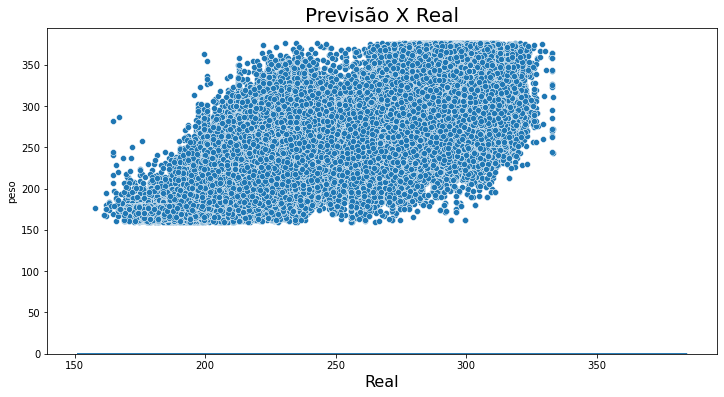

In [49]:
ax = sns.scatterplot(x = y_predicted_train, y=y_train)
ax = sns.distplot(df['peso'])   
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=20)
ax.set_xlabel('Previsão', fontsize=16)
ax.set_xlabel('Real', fontsize=16)
ax

### Obtendo o Resíduo (U)

In [51]:
residuo = y_train - y_predicted_train

### PLOTANDO A DISTRIBUIÇÃO DE FREQUÊNCIA DOS RESÍDUOS

/home/inara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuiçã de Frenquência dos Resíduos'}, xlabel='Peso', ylabel='Density'>

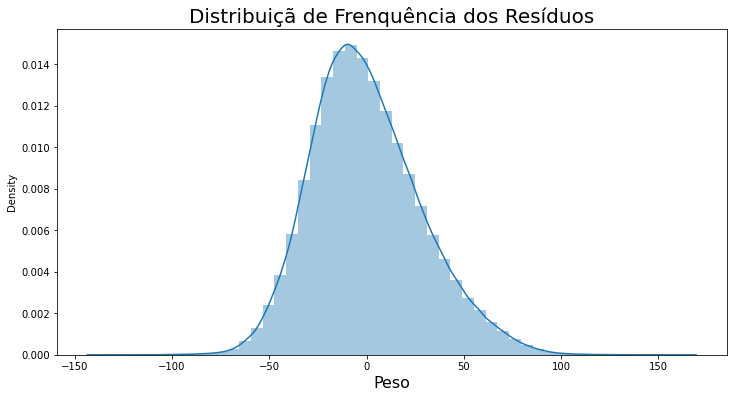

In [53]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frenquência dos Resíduos', fontsize=20)
ax.set_xlabel('Peso', fontsize=16)
ax

In [54]:
#Ver no outro curso ess parte